## Jupyter Notebook

First things first, let's get some terminology straight.
- The *language* we're working in – Python 3.7 
- The *editor* we're using is Google Colab – The code runs on Google's servers, and shows the results on our browser
- This file is an interactive Python notebook, a `.ipynb` file. These are pretty special, also known as **Jupyter notebooks**. 

Jupyter notebooks have a few special properties that make it ideal for work with data:
 - Code is organized into cells, which can be **code** or **markdown** 
 - We can run the cells in **any order**, try it out!
 - The last item returned in a cell will print automatically, no need to wrap it with `print()`

In [82]:
x = 'Answer to the Ultimate Question of Life, the Universe, and Everything'

In [83]:
print(x) # Run this cell after running the one above, and again after running the one below

Answer to the Ultimate Question of Life, the Universe, and Everything


In [84]:
x = 42

Anything you can do in Python, you can do here! 

1. Write a function that takes a string as input, and does something to it 
2. In a new cell, call the function and test it out

In [85]:
def UltimateQuestion(computer_name):
    return computer_name + ' is thinking...'

In [86]:
UltimateQuestion('Deep Thought')

'Deep Thought is thinking...'

## Importing packages

We use the `pandas` package to easily work with data as tables.
<br>The `numpy` package allows us to work with some other special data types, like missing values
<br><br>We'll rename these as `pd` and `np`, just so its easier to refer to later on

In [87]:
import pandas as pd
import numpy as np

## Importing data (Titanic Dataset)

We'll be looking at a dataset of all the passengers of the titanic and their information along with whether they survived.

For this semester, we'll typically work with data in *tabular* format, the type you'd be used to in an excel spreadsheet. Data files saved in this format will usually have a `.csv` file ending, short for comma seperated values.

For example, a CSV file could look something like...

```
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
```

To import this, let's use the `pd.read_csv()` function:

In [88]:
url = 'https://raw.githubusercontent.com/dt3zjy/node/master/week-1/workshop/titanic.csv'
titanic = pd.read_csv(url)

Here, we've saved the data to a `dataframe` object named `crimes`

In [89]:
type(titanic)

pandas.core.frame.DataFrame

DataFrames contain our data in little "spreadsheet"-like structures. Whatever manipulations you can think of doing to the data, you can likely search how to do 

## Exploring dataframes

Let's take a look at the data. We'll use the function `.head()` to read in the first 5 rows

In [90]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Pclass: Different classes within the ship (first class, etc.)
- SibSp: Number of siblings that passenger had
- Parch: Number of parents or children that passenger had
- Embarked: Where the passenger boarded from --> Q is Queenstown, S is Southampton, C is Cherbourg

How big is the dataset? `.shape` returns a tuple with the dimensions as (rows, columns)

In [91]:
titanic.shape

(418, 12)

Let's try to understand our data a bit better. 
- How many different classes are in the dataset? 

In [92]:
titanic.Pclass.nunique()

3

- Where did the passengers come from? How many?

In [93]:
titanic.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

Show the oldest passenger by sorting the dataframe:

In [94]:
titanic.sort_values(by='Age', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
236,1128,0,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C
305,1197,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Subsetting

Subsetting is a super helpful tool. We'll take a look at this more depth in next week, but for now, here are the basics:

We can filter rows from a dataframe based on some condition

- Show passengers that boarded from `Q` (Queenstown)

In [95]:
titanic[titanic.Embarked == 'Q']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
16,908,0,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
47,939,0,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
63,955,1,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q
66,958,1,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q
70,962,1,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q
79,971,1,3,"Doyle, Miss. Elizabeth",female,24.0,0,0,368702,7.7500,NaN,Q


How would you show all passengers that were 21+ years old?

Hint: Same way as matching if statements in python, mirroring the syntax above

In [96]:
titanic[titanic.Age > 21]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


## Data Manipulation

What is the percentage of passengers with a sibling?

In [97]:
len(titanic[titanic['SibSp'] > 0])/len(titanic)*100

32.29665071770335

## Visualization

First things first, let's import the package to help us visualize the data, `plotly`.

If this package isn't yet included, we can install it using `!pip install plotly`. More on this week 5. 

In [98]:
import plotly.express as px

Note that we're using the sub package of the broader package, called `plotly express`. This simplifies a lot of the more difficult steps

Plotly express has a broad range of options to play with, let's take a look at the documentation. 
<br>Do a quick google search to pull up documentation for `px.scatter` OR run `px.scatter?` in a Jupyter cell

In [99]:
px.histogram?

Signature:
px.histogram(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders={},
    labels={},
    color_discrete_sequence=None,
    color_discrete_map={},
    marginal=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    barnorm=None,
    histnorm=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    histfunc=None,
    cumulative=None,
    nbins=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a histogram, rows of `data_frame` are grouped together into a
    rectangular mark to visualize the 1D distribution of an aggregate
    function `histfunc` (e.g. the count or sum) of the value `y` (or `x` if
    `orientation` is `'h'`).
    
Parameters
----------
data

Let's look at the age distribution

In [100]:
fig = px.histogram(titanic, x='Age', color='Pclass', opacity=.8)
fig.show()

Look at the stacked histogram. What does the data tell you?

### Machine Learning Showcase

Let's take this data and apply machine learning on it. Are you able to find out if someone survived based on their information?

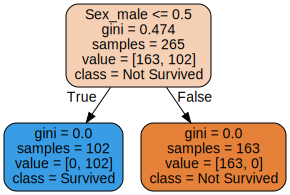

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic = titanic.drop(columns=['Name', 'Ticket','Fare','Cabin','Embarked'])

titanic = titanic.dropna()
titanic = pd.get_dummies(titanic)

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

from IPython.display import display, HTML
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(clf,
                        out_file=None,
                        feature_names=X_train.columns,
                        class_names=['Not Survived', 'Survived'],
                        filled=True,
                        rounded=True))
graph